## Feature Selection

Using XGBoost, aka Extreme Gradient Boosting
Grid search approach to improve XGB classifier performance
Plot of the importance scores for each feature

To use XGBoost, installation of the library is required
(conda install -c anaconda py-xgboost)

### Basic Data Preparation

In [1]:
# import everything we need first
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('xAPI-Edu-Data.csv')

In [3]:
#make the random capitalisations in some of the columns consistent
df.rename(index=str, columns={'gender':'Gender', 'NationalITy':'Nationality',
                               'raisedhands':'RaisedHands', 'VisITedResources':'VisitedResources'},
                               inplace=True)

In [4]:
#Encoding of categorical features
from sklearn.preprocessing import LabelEncoder

X = df.drop('Class', axis=1)
y = df['Class']

# Encoding our categorical columns in X
labelEncoder = LabelEncoder()
cat_columns = X.dtypes.pipe(lambda x: x[x == 'object']).index
for col in cat_columns:
    X[col] = labelEncoder.fit_transform(X[col])
    


### Split dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Model selection(XGBClassifier) and performance evaluation

In [6]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score
xgb = XGBClassifier(seed=42)
pred = xgb.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred))
print("Accuracy is "+ str(accuracy_score(y_test, pred))) 

[[20  0  8]
 [ 0 30  4]
 [ 8  7 43]]
Accuracy is 0.775


### Plot importance of features

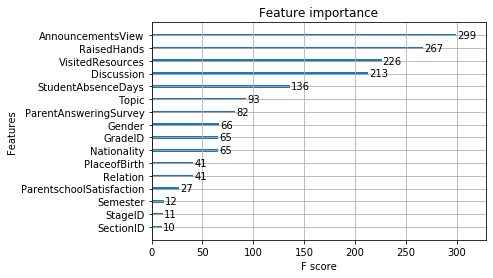

In [7]:
plot_importance(xgb)
plt.rcParams['figure.figsize']=(10,10)
plt.show()

### Find parameters to improve performance of XGB classifier using grid search approach

In [8]:
d_values = []
l_values = []
n_values = []
acc_values = []
depth = [2, 3, 4]
learning_Rate = [0.01, 0.1, 1]
n_estimators = [50, 100, 150, 200]
for d in depth:
    for l in learning_Rate:
        for n in n_estimators:
            xgb = XGBClassifier(max_depth=d, learning_rate=l, n_estimators=n, seed=42)
            pred = xgb.fit(X_train, y_train).predict(X_test)
            acc = accuracy_score(y_test, pred)
            d_values.append(d)
            l_values.append(l)
            n_values.append(n)
            acc_values.append(acc)
            
dict = {'max_depth':d_values, 'learning_rate':l_values, 'n_estimators':n_values,
       'Accuracy':acc_values}

output = pd.DataFrame.from_dict(data=dict)
print(output.sort_values(by='Accuracy', ascending=False)) 

    max_depth  learning_rate  n_estimators  Accuracy
6           2           0.10           150  0.833333
5           2           0.10           100  0.825000
20          3           1.00            50  0.816667
30          4           0.10           150  0.816667
13          3           0.01           100  0.816667
16          3           0.10            50  0.808333
22          3           1.00           150  0.808333
4           2           0.10            50  0.808333
7           2           0.10           200  0.808333
28          4           0.10            50  0.808333
29          4           0.10           100  0.808333
14          3           0.01           150  0.808333
15          3           0.01           200  0.808333
18          3           0.10           150  0.800000
23          3           1.00           200  0.800000
21          3           1.00           100  0.800000
27          4           0.01           200  0.800000
11          2           1.00           200  0.

### Building XGB classifier with optimal parameters and plotting the feature importances

[[20  0  8]
 [ 0 31  3]
 [ 4  5 49]]
Accuracy is 0.8333333333333334


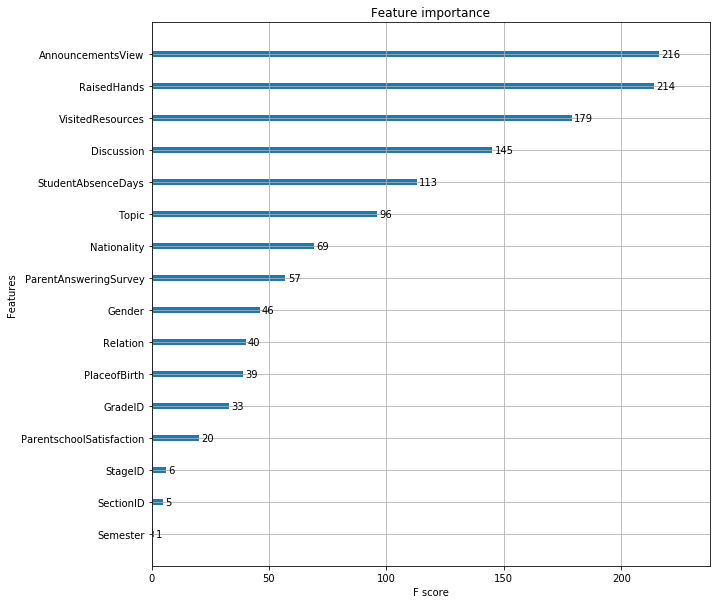

In [9]:
xgb_improved = XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=150, seed=42)
pred = xgb_improved.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred))
print("Accuracy is "+ str(accuracy_score(y_test, pred)))   

plot_importance(xgb_improved)
plt.rcParams['figure.figsize']=(10,10)
plt.show()

From the feature importance plot above, our group came up with our reduced model using the top five features, which we will examine further using the various supervised machine learning techniques.